[Ссылка на соревнование](https://mlbootcamp.ru/round/15/tasks/?utm_source=vk&utm_medium=social_post&utm_campaign=mlbootcamp7&utm_term=vk-announcement-15-11-2018&utm_content=1)

# Imports

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

import xgboost as xgb

In [1]:
!ls

!dataset_fields_description.xlsx
Main.ipynb
bs_avg_kpi.csv
bs_chnn_kpi.csv
sample-submit-zero.csv
submission.csv
test
train


# Pre-Processing

In [13]:
# another_home_data = pd.read_csv('train/subs_features_train.csv', sep=';', decimal=',',encoding = "windows-1251")
# another_home_data.head()

train = pd.read_csv('train/subs_features_train.csv', sep=';', decimal=',',encoding = "windows-1251")
test = pd.read_csv('test/subs_features_test.csv', sep=';', decimal=',',encoding = "windows-1251")

In [14]:
target_table_train = pd.read_csv('train/subs_csi_train.csv', sep=';', decimal=',',encoding = "windows-1251")
target_table_test = pd.read_csv('test/subs_csi_test.csv', sep=';', decimal=',',encoding = "windows-1251")

In [15]:
# another_home_data.fillna(another_home_data.mean())
train.fillna(train.mean())

test.fillna(test.mean())
# 
# train.fillna(0)

# test.fillna(0)

,SNAP_DATE,COM_CAT#1,SK_ID,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,COM_CAT#8,...,COM_CAT#25,COM_CAT#26,COM_CAT#27,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34
0,01.10.01,8,6954,44,12,1,1,12.000000,3,875.009032,...,1,1,0.014411,0.036439,0.000000,0.000000,0.040759,0.027579,0.103896,10.0
1,01.10.01,8,9663,44,5,2,1,8.000000,1,952.000000,...,1,1,0.003488,0.000493,0.000002,0.000000,0.044780,0.027579,0.103896,10.0
2,01.10.01,8,7895,12,5,2,1,7.000000,4,1322.000000,...,1,1,0.038253,0.001190,0.000000,0.000000,0.032650,0.027579,0.103896,10.0
3,01.10.01,8,8913,52,8,2,1,9.000000,1,126.000000,...,1,1,0.010588,0.009464,0.001677,0.005317,0.062162,0.027579,0.103896,7.0
4,01.10.01,8,8876,44,5,2,1,7.000000,3,1244.000000,...,1,1,0.011436,0.008762,0.000000,0.000000,0.077768,0.027579,0.103896,3.0
5,01.10.01,8,8837,52,5,2,1,12.000000,2,110.000000,...,1,1,0.071727,0.087881,0.000989,0.008519,0.117325,0.027579,0.103896,2.0
6,01.10.01,8,6543,3,5,2,1,1.000000,1,1311.000000,...,1,1,0.000902,0.000000,0.000000,0.000000,0.002917,0.027579,0.103896,10.0
7,01.10.01,8,5407,44,1,2,1,8.000000,1,1233.000000,...,1,1,0.023409,0.025655,0.008293,0.000000,0.031598,0.027579,0.103896,9.0
8,01.10.01,8,4790,76,2,2,1,6.000000,3,1084.000000,...,1,1,0.013786,0.005804,0.000000,0.000000,0.027666,0.027579,0.103896,3.0
9,01.10.01,8,7486,19,3,2,1,12.000000,1,139.000000,...,1,1,0.029605,0.042568,0.000195,0.001545,0.095876,0.027579,0.103896,1.0


In [72]:
# рандом фичи
features = [
            'SK_ID',
            'ITC',
#             'VAS',
            'COM_CAT#1',
#             'COM_CAT#2',
            'COST',
#             'COM_CAT#21',
#             'COM_CAT#22',
#             'COM_CAT#23',
#             'COM_CAT#25',
#             'RENT_CHANNEL',
#             'COM_CAT#26', 
            'COM_CAT#27',        
            'ACT',
           ]

In [73]:
X_train = train[features][0:4222] # тут 5221
Y_train = target_table_train.CSI # а тут 4222, хз че делать
X_train.shape, Y_train.shape

((4222, 6), (4222,))

In [74]:
X_eval = test[features][0:4222]
Y_eval = target_table_train.CSI
X_eval.shape, Y_eval.shape

((4222, 6), (4222,))

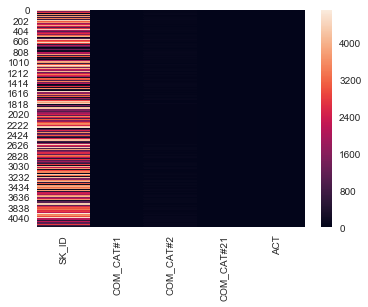

In [694]:
sns.set()
axaxa = sns.heatmap(X_train)

In [695]:
?sns.heatmap

In [104]:
from sklearn.ensemble import ExtraTreesClassifier
x = -1
feat_model = ExtraTreesClassifier(random_state=42)
feat_model.fit(X_train, Y_train)
lst = feat_model.feature_importances_
lst
# sorted(lst, reverse=True)
for i in (lst):
    x += 1
    print(features[x],"=", i)


SK_ID = 0.24465932631187304
ITC = 0.22773826840908612
COM_CAT#1 = 0.057127429438775745
COST = 0.23178010271184962
COM_CAT#27 = 0.23766468895647627
ACT = 0.001030184171939229


In [19]:
dtrain = xgb.DMatrix(X_train, label=Y_train)
deval = xgb.DMatrix(X_eval, label=Y_eval)

param = {
    'max_depth': 10,  #10 the maximum depth of each tree
    'eta': 0.205,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
#     'objective': 'multi:softmax',
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 2,
        }  # the number of classes that exist in this datset
num_round = 150 # the number of training iterations


In [697]:
%%time
bst = xgb.train(param, dtrain, num_round)

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
prob = bst.predict(deval)
pred_train = pd.DataFrame(np.asarray([np.argmax(line) for line in prob]))
print('Validation Set Accuracy:', accuracy_score(Y_eval, pred_train))

print('Validation Set ROC_AUC:', roc_auc_score(Y_eval, pred_train))

Validation Set Accuracy: 0.8287541449549977
Validation Set ROC_AUC: 0.5061552706455276
Wall time: 1.36 s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D85F398470>]],
      dtype=object)

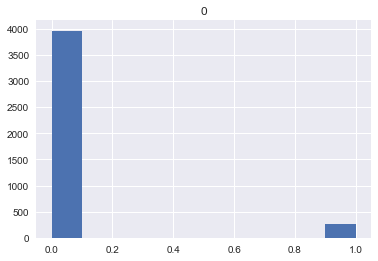

In [700]:
preds = bst.predict(xgb.DMatrix(X_train))
predictions = pd.DataFrame(np.asarray([np.argmax(line) for line in preds]))
predictions.hist()

# Feature Selection

In [528]:
# X.fillna(0)

In [529]:
# sns.set()
# sns.heatmap(X_train)

# Creating Model

In [530]:
# dtrain = xgb.DMatrix(X_train, label=Y_train)
# deval = xgb.DMatrix(X_eval, label=Y_eval)

In [531]:
# param = {
#     'max_depth': 10,  # the maximum depth of each tree
#     'eta': 0.3,  # the training step for each iteration
#     'silent': 1,  # logging mode - quiet
#     'objective': 'multi:softprob',  # error evaluation for multiclass training
#     'num_class': 2}  # the number of classes that exist in this datset
# num_round = 100  # the number of training iterations

In [532]:
# %%time
# bst = xgb.train(param, dtrain, num_round)

Wall time: 793 ms


In [426]:
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import roc_auc_score
# prob = bst.predict(deval)
# pred_train = pd.DataFrame(np.asarray([np.argmax(line) for line in prob]))
# print('Validation Set Accuracy:', accuracy_score(Y_eval, pred_train))

# print('Validation Set ROC_AUC:', roc_auc_score(Y_eval, pred_train))

Validation Set Accuracy: 0.842728564661298
Validation Set ROC_AUC: 0.4988782950084128


In [273]:
# целевая переменная CSI в таблице subs_csi
# target_table = pd.read_csv('train/subs_csi_train.csv', sep=';', decimal=',',encoding = "windows-1251")
# target_table.head()

In [274]:
# Y = target_table.CSI
# # Y.fillna(0)
# Y.describe()

In [275]:
# определим тип модели
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors.nearest_centroid import NearestCentroid
# from sklearn.linear_model import SGDClassifier
# model = DecisionTreeClassifier(random_state=42)
# model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
# model = NearestCentroid()
# model = SGDClassifier()

In [276]:
# ?DecisionTreeClassifier

# Fitting Model

In [82]:
# model.fit(X, Y)

# Make Predictions

In [701]:
# preds = bst.predict(xgb.DMatrix(X_train))
predictions = pd.DataFrame(np.asarray([np.argmax(line) for line in preds]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D86204BB00>]],
      dtype=object)

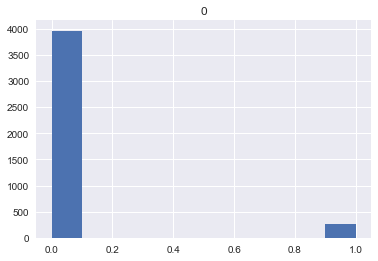

In [702]:
predictions.hist()

In [703]:
submission=pd.DataFrame(predictions.values.ravel())

In [704]:
submission.describe()

,0
count,4222.000000
mean,0.061819
std,0.240855
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [705]:
# работает не правильно т.к. вместо 5221 значений выдается 4222
submission.to_csv("submission_XGB.csv", index=False)


In [78]:
# print("Предсказание для следующих 10 клиентов:")
# print(X.head())
# print("Предсказание")
# print(model.predict(X.head()))

# Saving Progress

### Не рандом

In [325]:

# final_data = []
# output = pd.DataFrame(model.predict(X))


In [326]:
# output.describe

<bound method NDFrame.describe of       0
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
...  ..
4192  0
4193  0
4194  0
4195  0
4196  0
4197  0
4198  0
4199  0
4200  0
4201  0
4202  0
4203  0
4204  0
4205  0
4206  0
4207  0
4208  0
4209  0
4210  0
4211  0
4212  0
4213  0
4214  0
4215  0
4216  0
4217  0
4218  0
4219  0
4220  0
4221  0

[4222 rows x 1 columns]>

In [319]:
# output.to_csv('submission.csv', index=False)

### Рандом

In [90]:
import random
final_data = []

In [9]:
for i in range(1,5221):
  final_data.append(random.randint(0,1))

In [10]:
final_data[0:20]

[0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1]

In [11]:
output = pd.DataFrame(final_data)

output.to_csv('submission.csv', index=False)